In [1]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np
import matplotlib.pyplot as plt

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [2]:
files = ["/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt"]

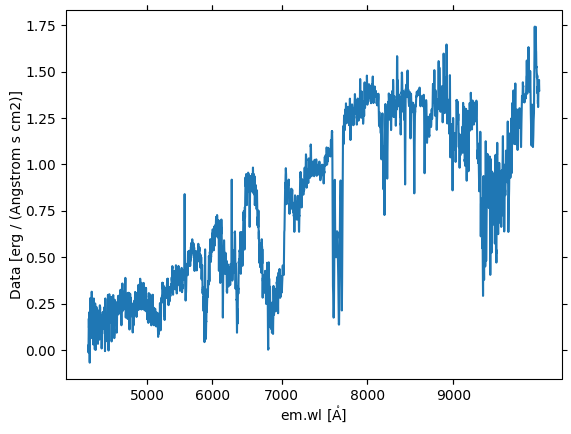

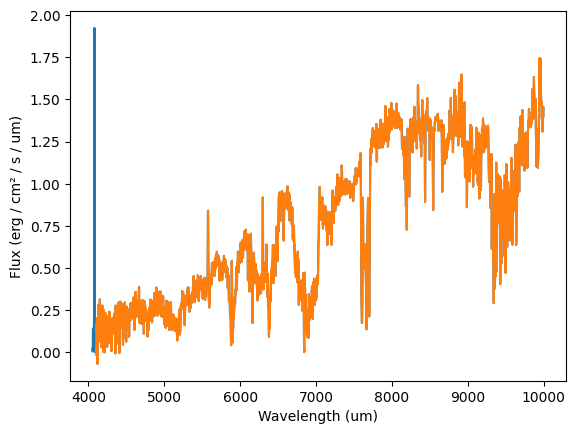

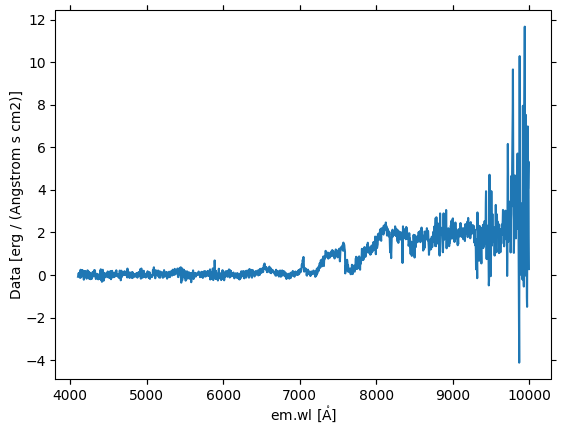

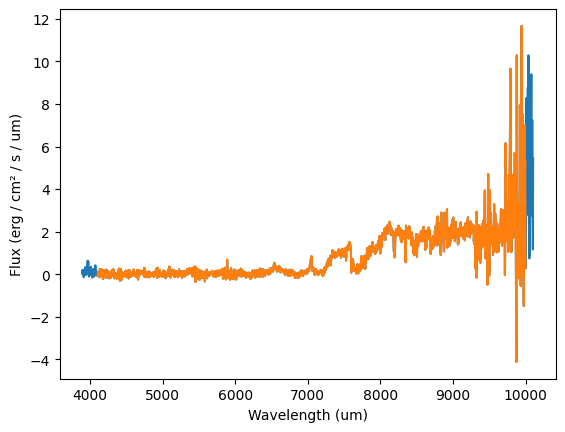

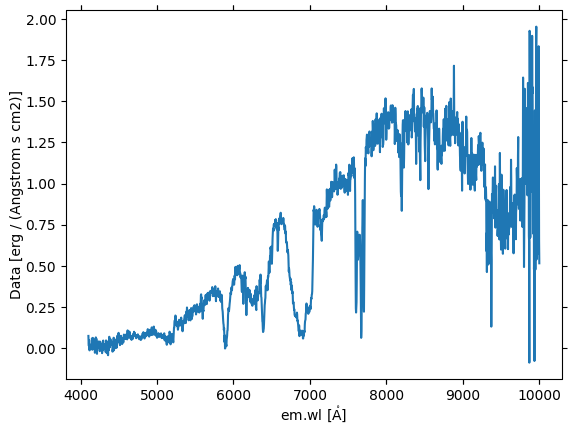

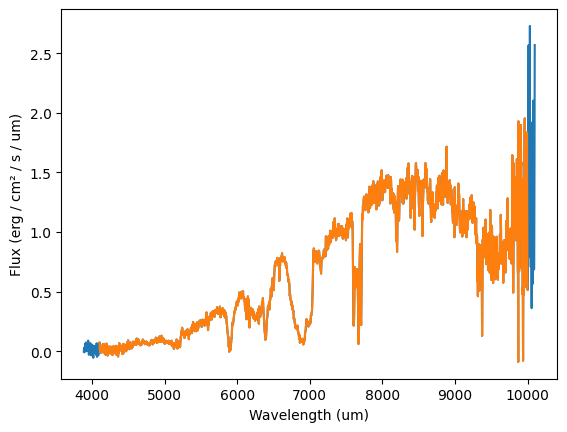

In [8]:
"""  Process source with BCSec spectra: Telescope: LCO-duP
Read the data on two columns:
#1: wavelength      #2: flux
"""
from specutils import Spectrum

import matplotlib.pyplot as plt
for file in files:

    data = np.loadtxt(file, comments="#")

    wavelength = data[:, 0] * u.AA
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)
    
    mask = np.logical_or(wavelength.value < 4100, wavelength.value > 10000)

    # Create Spectrum object
    spectrum = Spectrum(
        flux=flux,
        spectral_axis=wavelength,
        mask=mask
    )
    spectrum.plot()

    fig, ax = plt.subplots()
    ax.plot(spectrum.spectral_axis, spectrum.flux)
    ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask])

    ax.set_xlabel("Wavelength (um)")
    ax.set_ylabel("Flux (erg / cm² / s / um)")
    plt.show()